In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"D:\DOCUMENT\RAKSHA\project\time series\BAJAJFINSV.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [4]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

<Axes: xlabel='Date'>

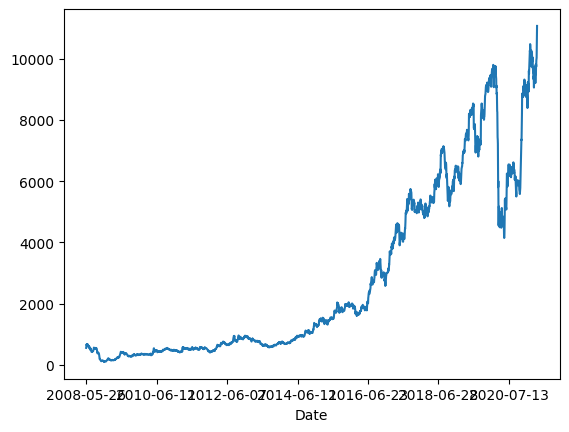

In [5]:
df['VWAP'].plot()

### so u can observe here some kind of Seasonality

### Data Pre-Processing

In [6]:
df.shape

(3201, 14)

In [7]:
df.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df.shape

(2456, 14)

In [11]:
data=df.copy()

In [12]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [13]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
data[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999690,0.999655,0.999413
High,0.999690,1.000000,0.999480,0.999745
Low,0.999655,0.999480,1.000000,0.999695
Close,0.999413,0.999745,0.999695,1.000000


In [15]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [16]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJAJFINSV,EQ,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJAJFINSV,EQ,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJAJFINSV,EQ,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,...,5.211126,NaN,7.057148,NaN,39069.997351,NaN,2.064161e+12,NaN,1237.121255,NaN
2011-06-06,BAJAJFINSV,EQ,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,...,6.885310,NaN,5.291503,NaN,16217.263682,NaN,8.469340e+11,NaN,551.246164,NaN
2011-06-07,BAJAJFINSV,EQ,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,...,22.744963,NaN,5.131601,NaN,694204.022264,NaN,3.732262e+13,NaN,20032.206344,NaN


In [19]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [20]:
data.shape

(2456, 34)

In [21]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [24]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [25]:
data.shape

(2450, 34)

In [26]:
training_data=data[0:1800]
test_data=data[1800:]

In [27]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJAJFINSV,EQ,560.75,559.75,574.40,545.20,563.00,564.20,564.84,1072031,...,11.227088,25.366481,21.815820,18.134406,82924.424540,588810.697885,2.974668e+12,3.246176e+13,2739.564260,16706.647648
2011-06-10,BAJAJFINSV,EQ,564.20,567.10,573.45,555.60,557.80,560.90,565.45,540701,...,5.433461,28.078483,10.954603,23.823448,337106.750014,559645.522999,1.849608e+13,3.081861e+13,8525.032727,15906.609064
2011-06-13,BAJAJFINSV,EQ,560.90,564.05,565.60,546.05,550.50,550.65,555.53,165282,...,4.829855,26.643267,5.774729,24.266892,455603.033254,544639.548097,2.580459e+13,2.994149e+13,12860.736099,15516.192893
2011-06-14,BAJAJFINSV,EQ,550.65,552.45,568.90,551.00,552.00,552.50,560.41,205216,...,3.941552,23.320303,4.776069,23.886410,206189.368923,518252.959225,1.173877e+13,2.842803e+13,6572.812513,14606.885007
2011-06-15,BAJAJFINSV,EQ,552.50,556.00,565.70,546.00,548.05,548.15,557.41,140596,...,1.877054,7.437061,2.872426,17.666585,32608.453280,498885.976619,1.853133e+12,2.730280e+13,1654.238294,13968.688219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJAJFINSV,EQ,6652.90,6660.00,6673.80,6480.05,6516.00,6508.20,6548.00,391449,...,147.703622,152.993847,123.160468,192.771028,105638.063992,87163.183045,6.649353e+13,5.468851e+13,14917.157538,12100.612846
2018-09-05,BAJAJFINSV,EQ,6508.20,6500.00,6559.15,6401.00,6509.55,6503.05,6489.04,182931,...,141.211299,196.500199,113.604141,215.735472,116740.704418,82722.686103,7.576472e+13,5.234771e+13,15482.052911,11934.079074
2018-09-06,BAJAJFINSV,EQ,6503.05,6520.00,6574.90,6458.90,6526.00,6547.30,6524.52,155679,...,62.147533,204.231029,40.923984,207.523839,128976.690871,81411.196037,8.483177e+13,5.235383e+13,14760.682448,11806.374545


In [30]:
##!pip install pmdarima

In [31]:




##!pip install pmdarima
## if pip install pmdarima fails to you, try as a user:
## pip install pmdarima --user
## !pip install pmdarima==1.7.1 
## !pip install pmdarima==1.7.1 --user

## using conda -->> conda install -c saravji pmdarima (where c is name of my channel)
## conda install -n [NameOfVEnv] -c saravji pmdarima
## !pip install urllib3

In [32]:
from pmdarima import auto_arima

In [33]:
import pmdarima
pmdarima.__version__

## 1.7.1
## '1.8.4' also works fine ! (tested in Time_case environment)

'2.0.4'

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

## model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

## Note : in the previous version , it takes around 120.829 seconds to execute while initializing arima
## In the 1.8.4 , it takes around  115.323 sec to execute while initializing arima ..
## In the 1.7.1 , it takes around  90.507 seconds sec to execute while fitting..
## In the latest 2.0.1 , it takes around 7.816 sec to execute while fitting..

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17180.306, Time=4.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17878.398, Time=2.74 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17495.742, Time=2.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17239.584, Time=2.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29569.396, Time=2.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18192.121, Time=4.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17218.128, Time=3.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=17372.760, Time=5.76 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17165.578, Time=4.69 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17164.388, Time=4.28 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17208.288, Time=4.65 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=17166.384, Time=4.84 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17277.383, Time=4.31 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=17204.833, Time=4.98 sec
 ARIMA(2,0,4)(0,0,0

In [36]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

##  model.fit(y=training_data['VWAP'] , exogenous= training_data[ind_features])

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [37]:
'''

model.fit(y=training_data['VWAP'] , x=training_data[ind_features])

## but after this,this will return a straight-line (ie constant value of prediction) in 1.7.1 version but in 1.8.4 ,it works fine


'''

"\n\nmodel.fit(y=training_data['VWAP'] , x=training_data[ind_features])\n\n## but after this,this will return a straight-line (ie constant value of prediction) in 1.7.1 version but in 1.8.4 ,it works fine\n\n\n"

In [38]:
## model.fit(training_data['VWAP'], exogenous=training_data[ind_features])

'''
### previous output while fitting
ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

'''

"\n### previous output while fitting\nARIMA(maxiter=50, method='lbfgs', order=(1, 0, 3), out_of_sample_size=0,\n      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),\n      start_params=None, suppress_warnings=False, trend=None,\n      with_intercept=False)\n\n"

### https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1800
Model:               SARIMAX(1, 0, 3)   Log Likelihood               -8556.151
Date:                Mon, 09 Sep 2024   AIC                          17162.301
Time:                        11:48:54   BIC                          17299.690
Sample:                             0   HQIC                         17213.016
                               - 1800                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Highrolling_mean_3         0.4424   4.61e-24    9.6e+22      0.000       0.442       0.442
Highrolling_mean_7         0.0916   4.63e-24   1.98e+22      0.000       0.092       0.092
Lowrolling_mean_3          0.8405   4.57e-24   1.84e+23      0.000       0.841       0.841
Lowrolling_mean_7         -0.3766    4.5e-24  -8.37e+22      0.000      -0.377      -0.377
Volumerolling_mean_3    -1.67e-05    9.6e-23  -1.74e+17      0.000   -1.67e-05   -1.67e-05
Volumerolling_mean_7    3.608e-05   5.99e-23   6.02e+17      0.000    3.61e-05    3.61e-05
Turnoverrolling_mean_3  6.101e-13   4.44e-14     13.747      0.000    5.23e-13    6.97e-13
Turnoverrolling_mean_7  -6.35e-13   4.56e-14    -13.934      0.000   -7.24e-13   -5.46e-13
Tradesrolling_mean_3      -0.0001   1.19e-23  -8.78e+18      0.000      -0.000      -0.000
Tradesrolling_mean_7      -0.0002   7.21e-24  -3.11e+19      0.000      -0.000      -0.000
Highrolling_std_3          0.3095    1.4e-26   2.22e+25      0.000       0.310       0.310
Highrolling_std_7          0.1993   1.94e-26   1.03e+25      0.000       0.199       0.199
Lowrolling_std_3           0.0860    2.4e-26   3.58e+24      0.000       0.086       0.086
Lowrolling_std_7          -0.3373   2.76e-26  -1.22e+25      0.000      -0.337      -0.337
Volumerolling_std_3    -1.668e-05   1.01e-22  -1.66e+17      0.000   -1.67e-05   -1.67e-05
Volumerolling_std_7    -3.458e-05    1.2e-22  -2.89e+17      0.000   -3.46e-05   -3.46e-05
Turnoverrolling_std_3  -2.299e-13    3.9e-14     -5.901      0.000   -3.06e-13   -1.54e-13
Turnoverrolling_std_7   3.173e-13   3.85e-14      8.237      0.000    2.42e-13    3.93e-13
Tradesrolling_std_3        0.0007   3.24e-24   2.01e+20      0.000       0.001       0.001
Tradesrolling_std_7        0.0001   5.66e-24   2.13e+19      0.000       0.000       0.000
ar.L1                      0.7086   5.65e-26   1.25e+25      0.000       0.709       0.709
ma.L1                     -0.0813   3.81e-26  -2.13e+24      0.000      -0.081      -0.081
ma.L2                     -0.5396   7.69e-27  -7.02e+25      0.000      -0.540      -0.540
ma.L3                     -0.1384    7.5e-27  -1.85e+25      0.000      -0.138      -0.138
sigma2                   795.8700   5.27e-29   1.51e+31      0.000     795.870     795.870
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3067.63
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              22.62   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+46. Standard

In [40]:
# doing Forecast

forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

## forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [41]:
forecast

1800     6367.426606
1801     6394.304785
1802     6532.722594
1803     6604.588062
1804     6640.644029
            ...     
2445     9927.978177
2446     9969.810071
2447    10244.561437
2448    10864.411959
2449    11295.909991
Length: 650, dtype: float64

In [42]:
test_data['Forecast_ARIMA']= forecast

In [43]:
test_data['Forecast_ARIMA']

Date
2018-09-11   NaN
2018-09-12   NaN
2018-09-14   NaN
2018-09-17   NaN
2018-09-18   NaN
              ..
2021-04-26   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
Name: Forecast_ARIMA, Length: 650, dtype: float64

<Axes: xlabel='Date'>

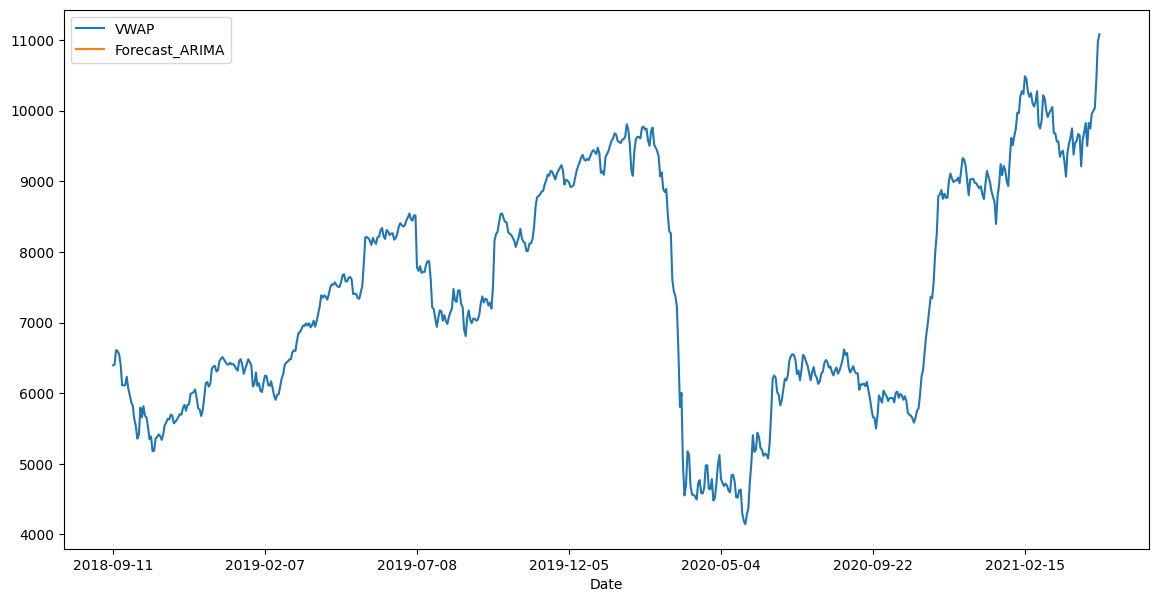

In [44]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

ValueError: Input contains NaN.

In [37]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

79.96180280266465

In [ ]:
### mean, var, std--> gives worst prediction RMSE 1484, MAE 1228
### mean --> gives 122 RMSE, gives 82 MAE
### mean,std--> gives 120,79

#### Lets make some future data

In [53]:
test_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782,2600.779264
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966,2625.163367
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344,2600.998281
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176,2556.425804
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,10189.437390,32916.577887,2572.878339


In [54]:
test_data.reset_index(inplace=True)

In [58]:
test_data['Date'].dtype

dtype('O')

In [59]:
test_data['Date']=pd.to_datetime(test_data['Date'])

In [60]:
test_data['Date'].dtype

dtype('<M8[ns]')

In [61]:
test_data.set_index('Date',inplace=True)

In [62]:
test_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782,2600.779264
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966,2625.163367
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344,2600.998281
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176,2556.425804
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,10189.437390,32916.577887,2572.878339


In [78]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 12 months,
future_dates=[test_data.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [79]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=test_data.columns)

In [80]:
future_dataset_df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
future_dataset_df.shape

(11, 35)

In [82]:
future_df=pd.concat([test_data,future_dataset_df])

In [83]:
future_df.shape

(496, 35)

In [91]:
future_df.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
